# ML Model for bike sharing

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands



## Steps followed for building model

-  Step 1: Importing and Understanding Data
-  Step 2: Visualising the Data
-  Step 3: Data Preparation
-  Step 4: Splitting the Data into Training and Testing Sets
-  Step 5: Building a linear model
-  Step 6: Residual Analysis of the train data
-  Step 7: Making Predictions Using the Final Model
-  Step 8: R-square for test data
-  Step 9: Model Evaluation
-  Step 10: Final Interpretation

## Step 1: Importing and Understanding Data

In [264]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [265]:
# Read the data set
data = pd.read_csv("day.csv")

In [266]:
# Check the head of the dataset
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [267]:
data.shape

(730, 16)

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [269]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's see inside the data and try to understand the behaviour of the the different facters that affects on business

In [270]:
# Before that we need to convert data into proper formate by Mapping variables season, month, weathersit, weekday

data['season']=data.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
data['mnth']=data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Cloudy',3:'Light Snow',4:'Snow'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


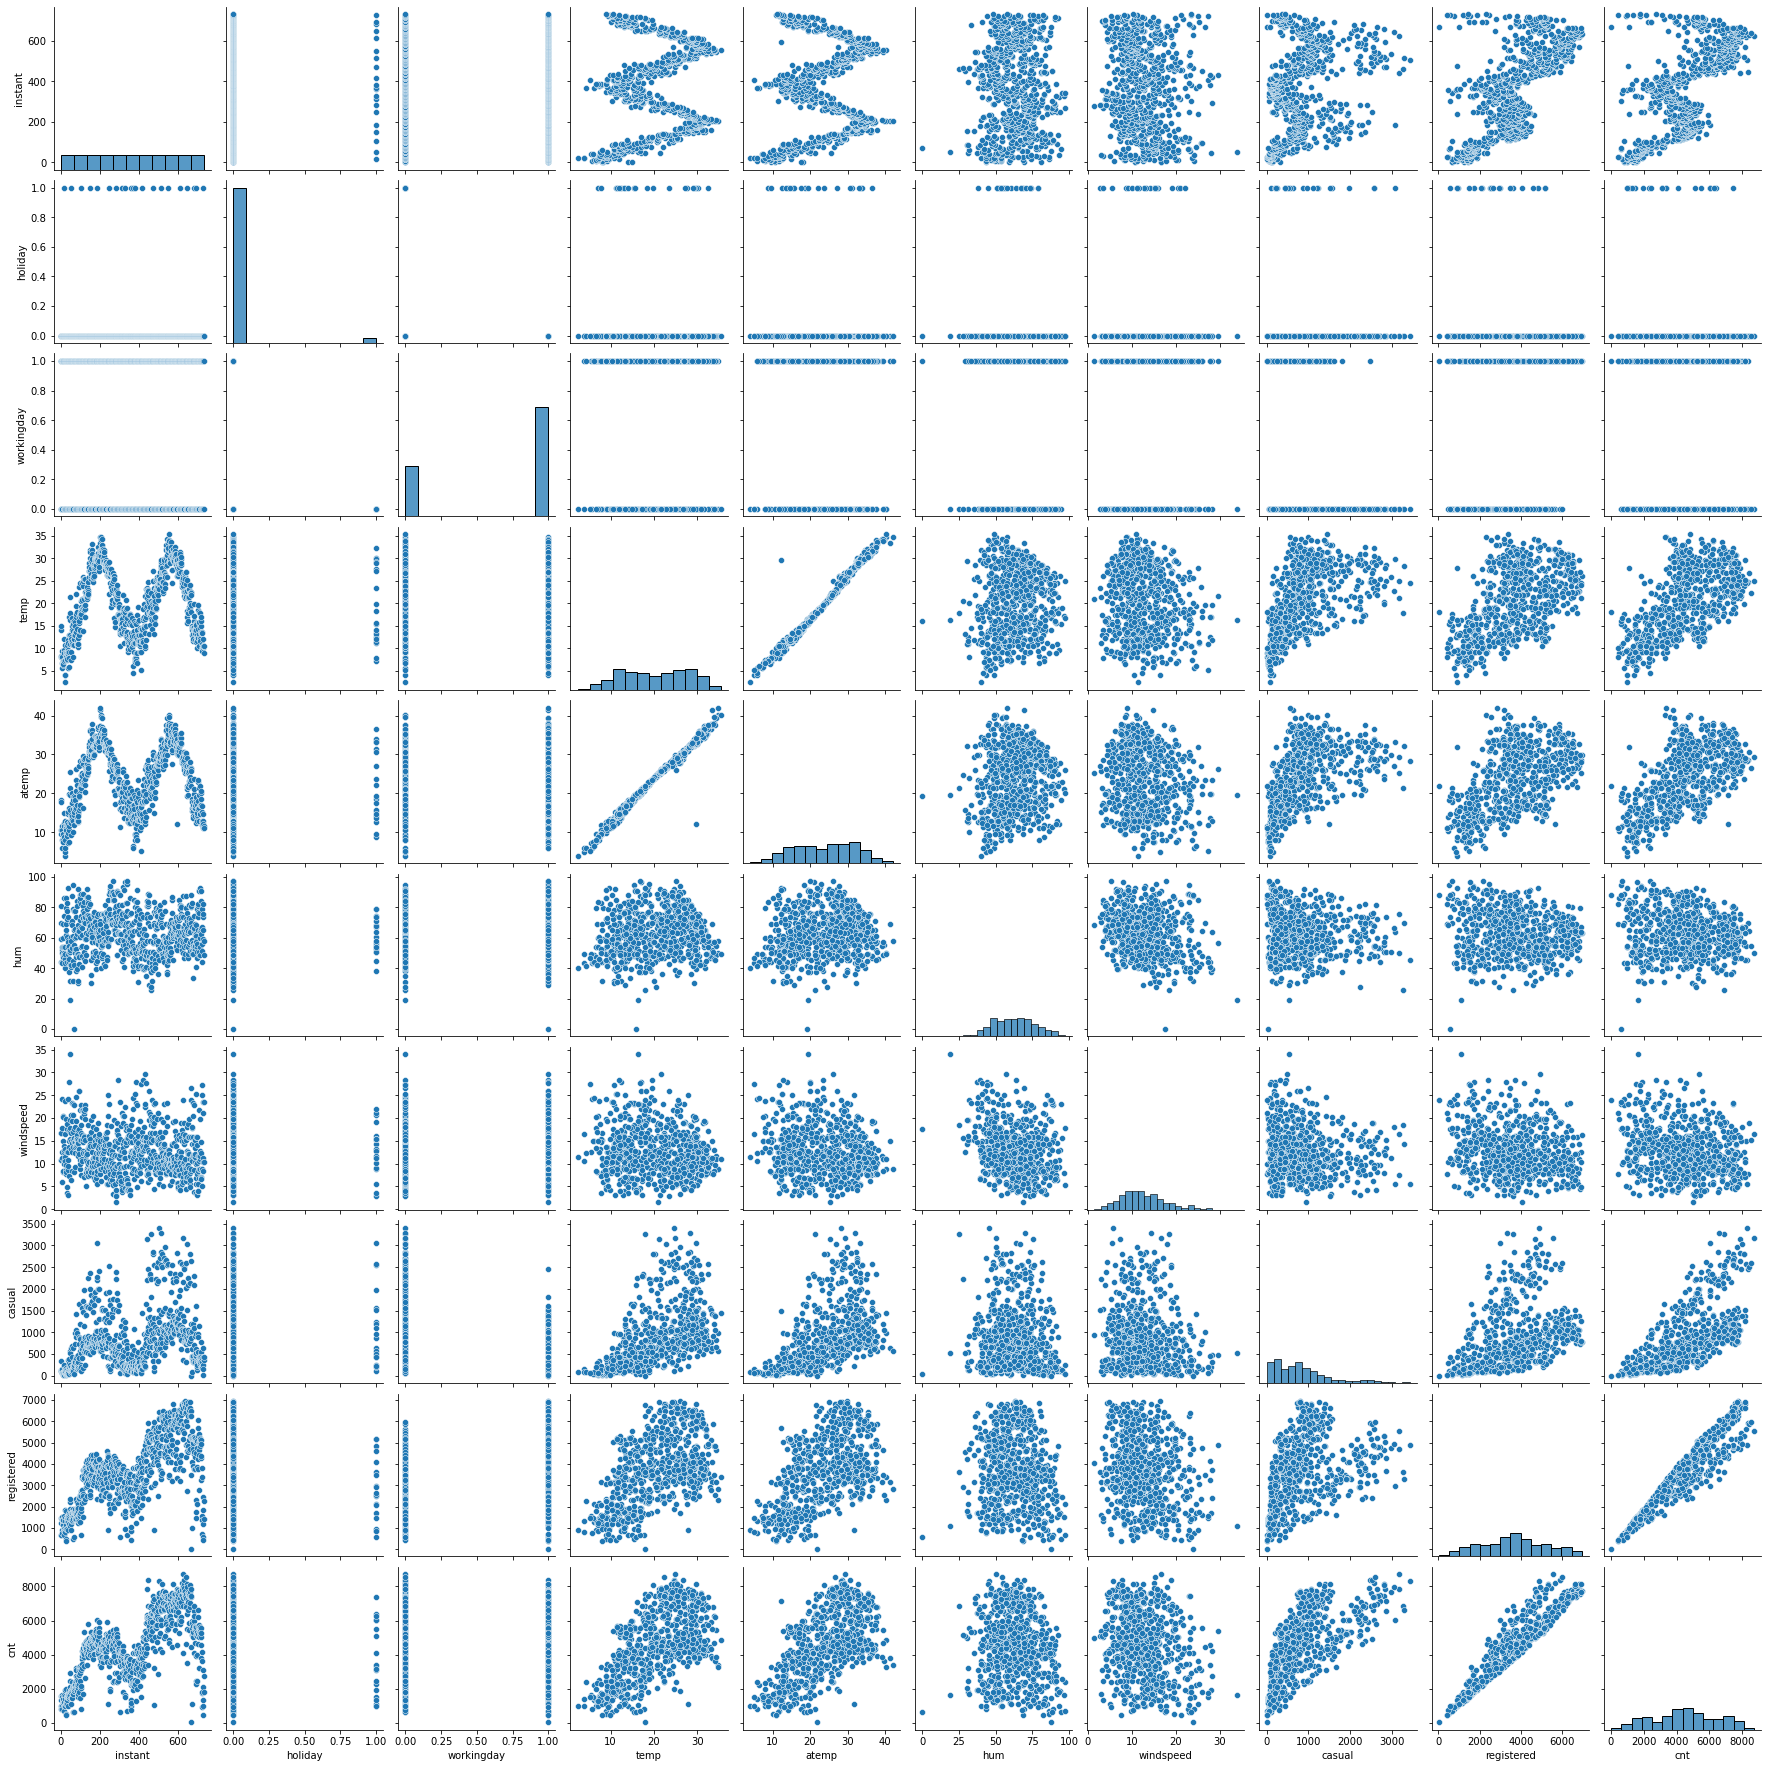

In [273]:
# To see pair plot of numerical variables

sns.pairplot(data, vars=['instant', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'  ])
plt.show()

## Conclusion:

1. we can see that temperature has most linear relationship with targer variables
2. We can also see that the variable atemp is giving simillar informaion like temp.


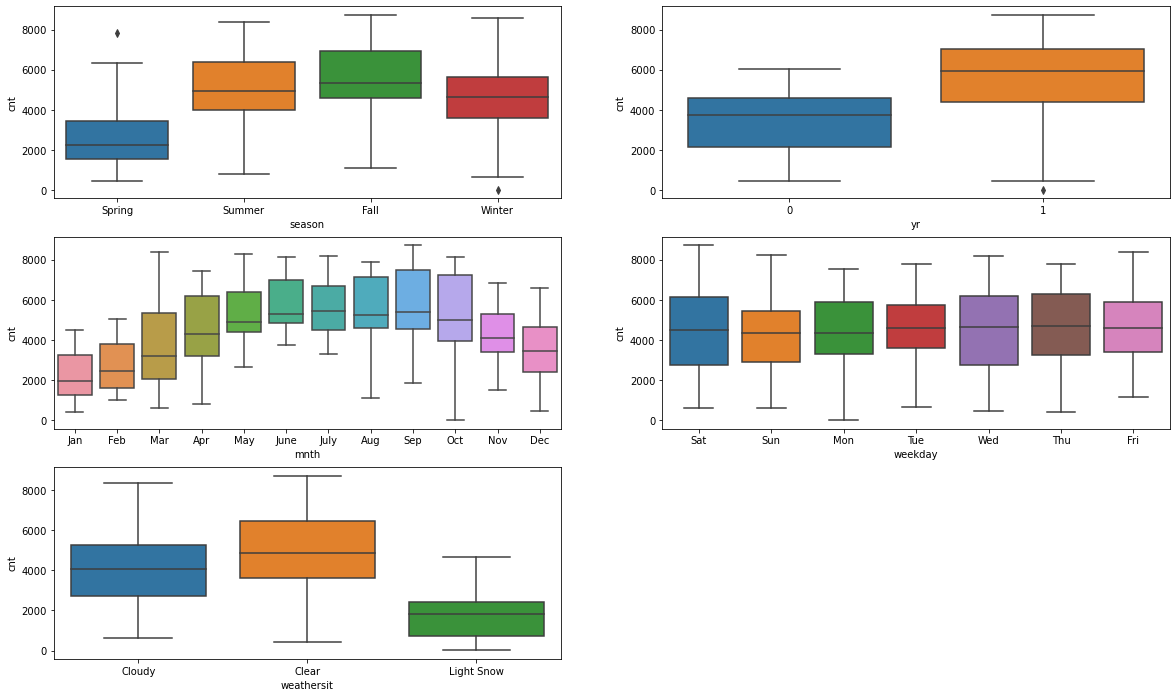

In [274]:
# Let's see Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)

plt.show()

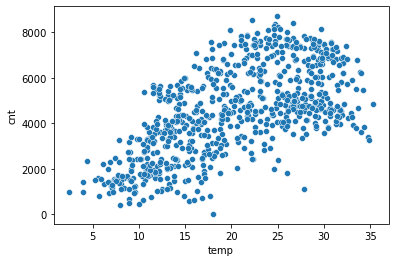

In [275]:
# scatter plot for temperature to count

sns.scatterplot(x='temp', y='cnt' ,data= data)
plt.show()

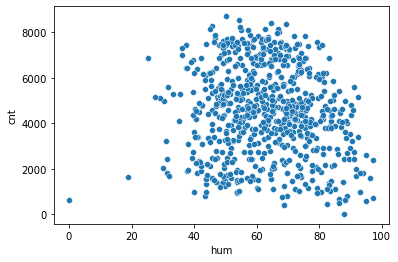

In [276]:
# scatter plot for humidiy to count

sns.scatterplot(x='hum', y='cnt',data= data)
plt.show()

# Step 3: Data Preparation

In [277]:
# As we can directly drop some variabls which not effecting the modul

data = data.drop(['instant','dteday','casual', 'registered'], axis=1)


In [278]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Creation of Dummy variables

In [280]:
# Dummy Variables

dummy_season = pd.get_dummies(data['season'], drop_first=True)
dummy_season.head(5)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [281]:
dummy_month = pd.get_dummies(data['mnth'], drop_first=True)
dummy_month.head(5)

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [282]:
dummy_weekdays = pd.get_dummies(data['weekday'], drop_first=True)
dummy_weekdays.head(5)

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [283]:
dummy_weather = pd.get_dummies(data['weathersit'], drop_first=True)
dummy_weather.head(5)

,Cloudy,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [284]:
# Adding dummies to main data set

data = pd.concat([data, dummy_season, dummy_month, dummy_weekdays, dummy_weather], axis = 1)

In [285]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [286]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Cloudy', 'Light Snow'],
      dtype='object')

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Spring      730 non-null    uint8  
 13  Summer      730 non-null    uint8  
 14  Winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  July        730 non-null    u

In [288]:
# Now remove the original variabls which is converted into dummy variables

data = data.drop(['season','mnth','weathersit', 'weekday'], axis=1)

In [289]:
data.shape

(730, 30)

In [290]:
data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


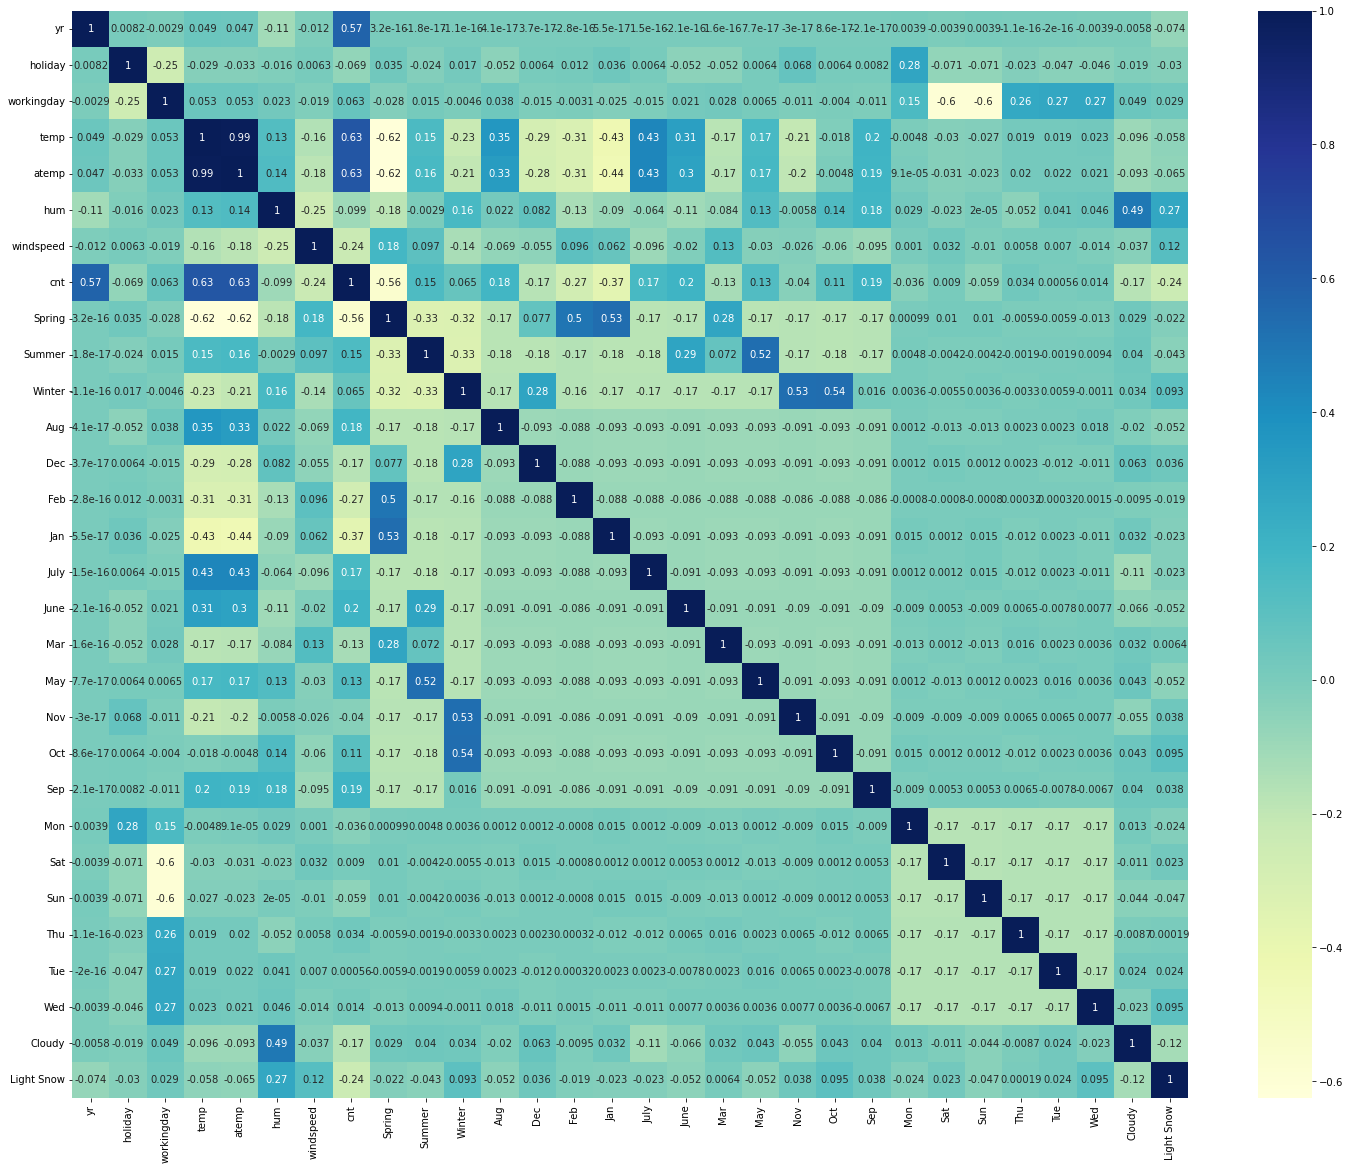

In [291]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Now our data is ready for analysis

## Step 4: Splitting the Data into Training and Testing Sets

In [292]:
import sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [293]:
data_train.shape

(510, 30)

In [294]:
data_test.shape

(219, 30)

In [295]:
from sklearn.preprocessing import MinMaxScaler

In [296]:
scaler = MinMaxScaler()

In [297]:
num_vars = [ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])


In [181]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


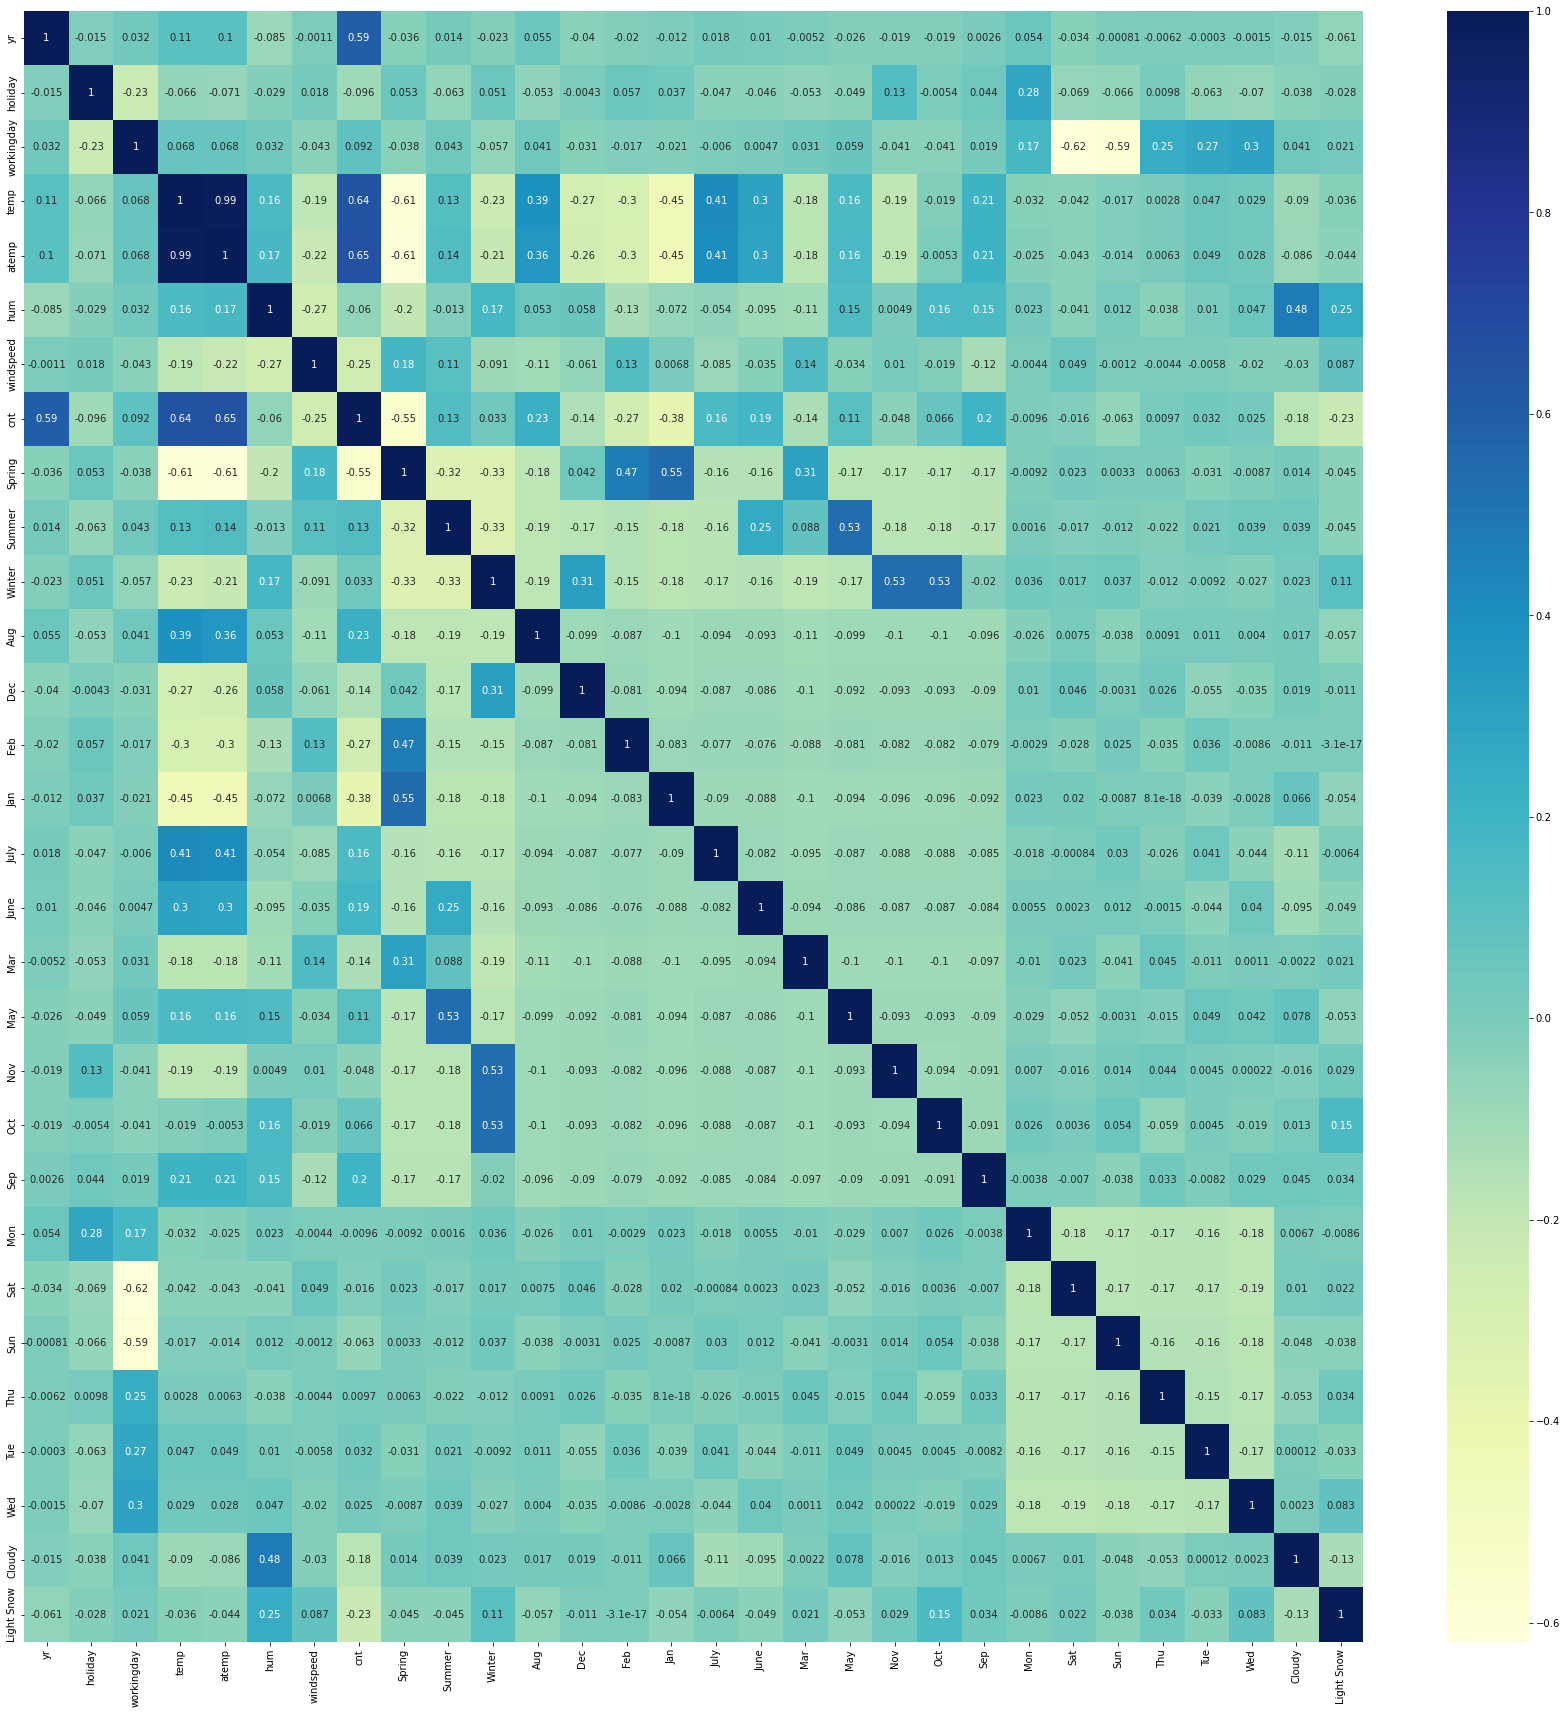

In [298]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

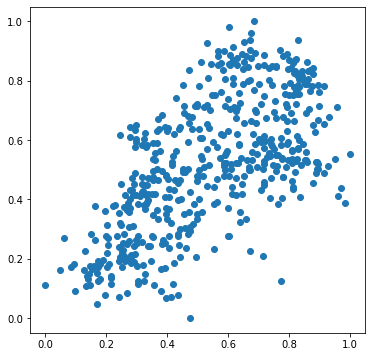

In [299]:
# temp has most corellaion with target variable

plt.figure(figsize=[6,6])
plt.scatter(data_train.temp, data_train.cnt)
plt.show()

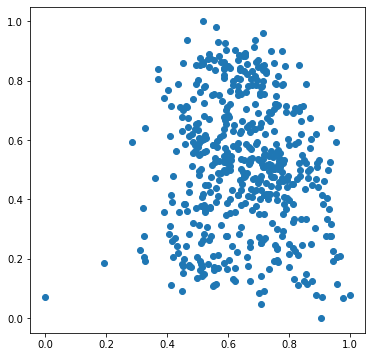

In [300]:
plt.figure(figsize=[6,6])
plt.scatter(data_train.hum, data_train.cnt)
plt.show()

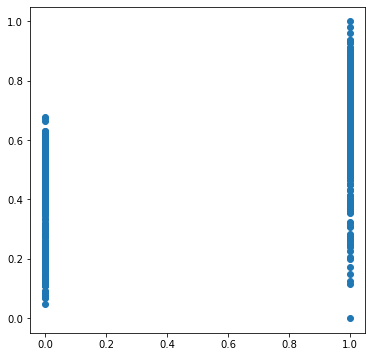

In [301]:
plt.figure(figsize=[6,6])
plt.scatter(data_train.yr, data_train.cnt)
plt.show()

## Step 5: Building a linear model

In [302]:
# Dividing into X and Y sets for the model building

y_train = data_train.pop('cnt')
X_train = data_train

In [303]:
# we have 30 variables so we need to do combine approch

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [304]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             
rfe = rfe.fit(X_train, y_train)

In [305]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winter', False, 3),
 ('Aug', False, 11),
 ('Dec', False, 7),
 ('Feb', False, 8),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 16),
 ('Mar', False, 18),
 ('May', False, 10),
 ('Nov', False, 6),
 ('Oct', False, 14),
 ('Sep', False, 2),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 13),
 ('Wed', False, 17),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1)]

In [307]:
# List of final 12 varables for model building

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'July', 'Sat', 'Sun', 'Cloudy', 'Light Snow'],
      dtype='object')

In [308]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [309]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [310]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [311]:
ml = sm.OLS(y_train,X_train_rfe).fit()

In [312]:
#Let's see the summary of our linear model

print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.60e-185
Time:                        05:39:43   Log-Likelihood:                 493.57
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2790      0.024     11.428      0.0

In [313]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
9,Sat,inf
10,Sun,inf
4,temp,2.01
5,hum,1.82
7,Spring,1.64
11,Cloudy,1.54
8,July,1.26
12,Light Snow,1.24


In [314]:
# As we can see p value of holiday is high so we will drop that

In [315]:
# As P value of holiday is significantlty high we can drop that

X_train_rfe1 = X_train_rfe.drop(["holiday"], axis = 1)

In [316]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [317]:
ml1 = sm.OLS(y_train,X_train_rfe1).fit()

In [318]:
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Mon, 09 May 2022   Prob (F-statistic):          5.60e-185
Time:                        05:41:19   Log-Likelihood:                 493.57
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2888      0.039      7.366      0.0

In [319]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.61
2,workingday,9.00
8,Sat,6.03
9,Sun,5.70
3,temp,2.01
4,hum,1.82
6,Spring,1.64
10,Cloudy,1.54
7,July,1.26
11,Light Snow,1.24


In [320]:
# The VIF vale for workingday is high so we can drop that

In [321]:
# the Variable workingday have high value of VIF we can drop that

X_train_rfe2 = X_train_rfe1.drop(["workingday"], axis = 1)

In [322]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [323]:
ml2 = sm.OLS(y_train,X_train_rfe2).fit()

In [324]:
print(ml2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.06e-183
Time:                        05:42:33   Log-Likelihood:                 487.70
No. Observations:                 510   AIC:                            -953.4
Df Residuals:                     499   BIC:                            -906.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3746      0.030     12.344      0.0

In [325]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.16
2,temp,2.01
3,hum,1.82
5,Spring,1.64
9,Cloudy,1.54
6,July,1.25
10,Light Snow,1.24
4,windspeed,1.16
7,Sat,1.04
8,Sun,1.04


In [326]:
# As P value of sat is significantlty high we can drop that

X_train_rfe3 = X_train_rfe2.drop(["Sat"], axis = 1)

In [327]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_rfe3)

In [328]:
ml3 = sm.OLS(y_train,X_train_rfe3).fit()

In [329]:
print(ml3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.45e-184
Time:                        05:43:04   Log-Likelihood:                 486.85
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.030     12.543      0.0

In [330]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.56
2,temp,2.01
3,hum,1.82
5,Spring,1.64
8,Cloudy,1.54
6,July,1.25
9,Light Snow,1.24
4,windspeed,1.16
1,yr,1.03
7,Sun,1.01


### AS for all the variables the p value and VIF in range, So our final model is ready

## Step 6: Residual Analysis of the train data

In [331]:
# Finally model is ready for evalution
#y train predicted

y_train_pred = ml3.predict(X_train_rfe3)

In [332]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

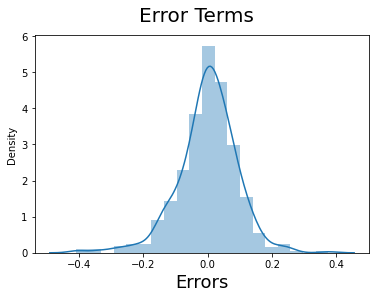

In [333]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## As error should be normal distribution, so our analysis is correct  

## Finding R-square for test data

In [334]:
# Evaluate R-square for test

from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8276454104048963

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final

## Applying the scaling on the test sets

In [336]:
num_vars = [ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

data_test[num_vars] = scaler.transform(data_test[num_vars])

In [337]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   cnt         219 non-null    float64
 8   Spring      219 non-null    uint8  
 9   Summer      219 non-null    uint8  
 10  Winter      219 non-null    uint8  
 11  Aug         219 non-null    uint8  
 12  Dec         219 non-null    uint8  
 13  Feb         219 non-null    uint8  
 14  Jan         219 non-null    uint8  
 15  July        219 non-null    uint8  
 16  June        219 non-null    uint8  
 17  Mar         219 non-null    uint8  
 18  May         219 non-null    uint8  
 19  Nov         219 non-null    

In [338]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [339]:
y_test = data_test.pop('cnt')
X_test = data_test

In [340]:
X_train_rfe3.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'Spring', 'July', 'Sun',
       'Cloudy', 'Light Snow'],
      dtype='object')

In [341]:
X_train_rfe3 = X_train_rfe3.drop(['const'], axis=1)

In [342]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_rfe3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [343]:
# Making predictions

y_pred = ml3.predict(X_test_new)

## Step 8: R-square for test data

In [344]:
#Evaluate R-square for test

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8075796591474775

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

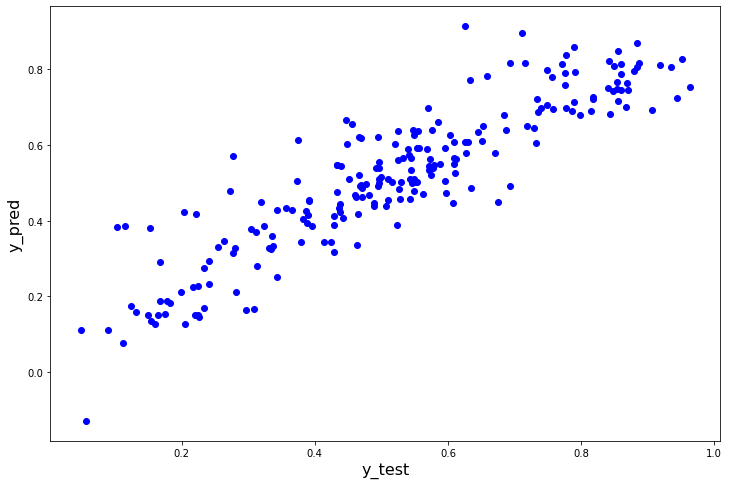

In [346]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16) 

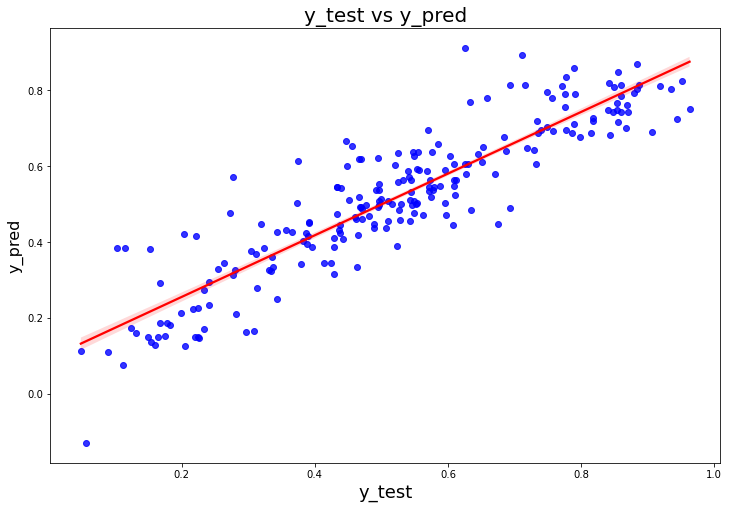

In [347]:
#Regression plot

plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

## Comparison between Train model and Test:¶

1. R- square value of train set is 0.8276
2. R- square value of test set is 0.8076
3. The percent difference between tain model and test model is 2.42% which is quite low ( It should be less than 5% )

## Step 10: Final Interpretation:

As we want answers of following questions, Let's see what is conclusin from model

1. Which variables are significant in predicting the demand for shared bikes.

-  As we can see that temperature has highest coefficiant i.e 0.4205. So increse in temperature is good for business
-  Also as the year 2018 businees is less due to covid,but in 2019 it is started recovering
-  Also Light snow have highest negative coeefiient of -0.2424.so in snow peoples are staying at home because of that its affect on demand of baikes.
-  Also humidity, cloudy weather, wind speed has negative effet on bsiness

2. How well those variables describe the bike demands

-  As we swa the percent difference between train data and test data is 2.42%. Therefore model is good fitted and it is giving very good describetion of varibles on bike demands